In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
actress = pd.read_json("acctress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [ ]:
df = actress[['bust', 'waist', 'hip', 'height', 'blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [ ]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A
6,85.0,60.0,88.0,165.0,A


In [ ]:
df.blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [ ]:
mapper = {'O': 0, 'A':1, 'B':2, 'AB':3}
df['blood_type'] = df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [ ]:
actress_np = df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [ ]:
k_mean_5 = KMeans(n_clusters=5)
k_mean_5.fit(actress_np)
label_5 = k_mean_5.labels_

In [ ]:
label_5

array([2, 4, 0, ..., 4, 2, 4], dtype=int32)

In [ ]:
metrics.silhouette_score(actress_np, label_5, metric='euclidean')

0.2370049406304688

In [ ]:
metrics.calinski_harabasz_score(actress_np, label_5)

1065.3449581281398

In [ ]:
k_mean_10 = KMeans(n_clusters=10)
k_mean_10.fit(actress_np)
label_10 = k_mean_10.labels_

In [ ]:
metrics.silhouette_score(actress_np, label_10, metric='euclidean')

0.19428036908043658

In [ ]:
metrics.calinski_harabasz_score(actress_np, label_10)

767.301005111497

In [ ]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(actress_np)
  sum_distances.append(k_mean.inertia_)

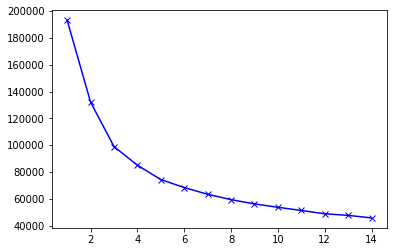

In [ ]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

In [ ]:
k_mean_3 = KMeans(n_clusters=3)
model = k_mean_3.fit(actress_np)
result = k_mean_3.labels_

In [ ]:
result

array([0, 1, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
metrics.silhouette_score(actress_np, result, metric='euclidean')

0.3042535380574929

In [ ]:
metrics.calinski_harabasz_score(actress_np, result)

1271.4075119627776

In [ ]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


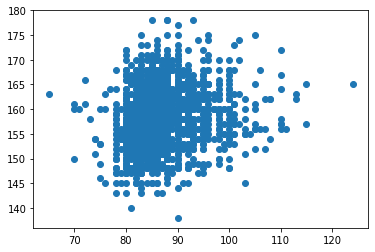

In [ ]:
plt.scatter(actress_np[:,0], actress_np[:,3])
plt.show()

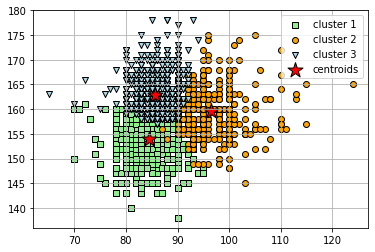

In [ ]:
plt.scatter(
    actress_np[result == 0, 0], actress_np[result == 0, 3],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    actress_np[result == 1, 0], actress_np[result == 1, 3],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    actress_np[result == 2, 0], actress_np[result == 2, 3],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 3],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Input: vong 1, vong 2, vong 3, chieu cao, nhom mau

-> thuoc ve cum nao (which cluster?)

random(10) in the clusters

In [ ]:
df1 = actress[['id','bust', 'waist', 'hip', 'height', 'blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [ ]:
df2 = actress[['id', 'name', 'japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [ ]:
lookup = df1.merge(df2, on='id', how='left')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [ ]:
lookup['cluster'] = result
lookup.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,0
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,1
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,2
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,2
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,2


In [ ]:
def recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau):
  arr = np.array([[vong1, vong2, vong3, chieu_cao, nhom_mau]])
  pred = model.predict(arr)
  return lookup[lookup['cluster'] == pred[0]].sample(10)

In [ ]:
vong1 = 85
vong2 = 55
vong3 = 88
chieu_cao = 155
nhom_mau = 0 # nhom mau 0

recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
2164,1042056,81.0,56.0,83.0,154.0,A,Takeda Yume,竹田ゆめ,0
2244,5155,85.0,58.0,85.0,155.0,O,Nakayama Nana,中山奈々,0
371,15485,83.0,58.0,83.0,158.0,O,Kawai Hinata,河合ひなた,0
1771,1021903,80.0,60.0,83.0,155.0,O,Abeno Miku,阿部乃みく,0
1803,1022328,80.0,54.0,83.0,157.0,O,Maika Natu,麻衣花なつ,0
2376,684,82.0,58.0,82.0,154.0,B,Miyauti Sayo,宮内沙世,0
2077,4644,80.0,59.0,85.0,157.0,A,Kayama Yui,加山由衣,0
556,1800,88.0,58.0,82.0,157.0,A,Simizu Kaori,清水かおり,0
1574,1012908,85.0,59.0,86.0,157.0,B,Maeda Kyouko,前田今日子,0
2668,10443,91.0,54.0,83.0,152.0,A,Kawase Erima,河瀬えまり,0


![Alt](https://i.ibb.co/8sMCJV7/Screenshot-2020-11-16-at-2-39-52-AM.png)